## ARBOL DE DESICION 

## 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  


In [93]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None 

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000

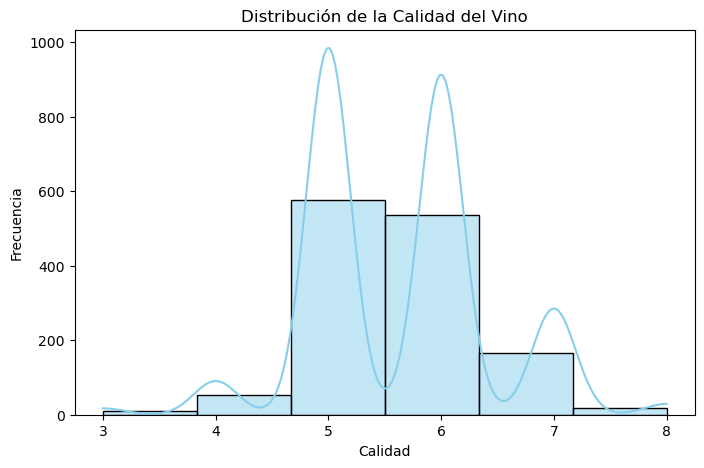

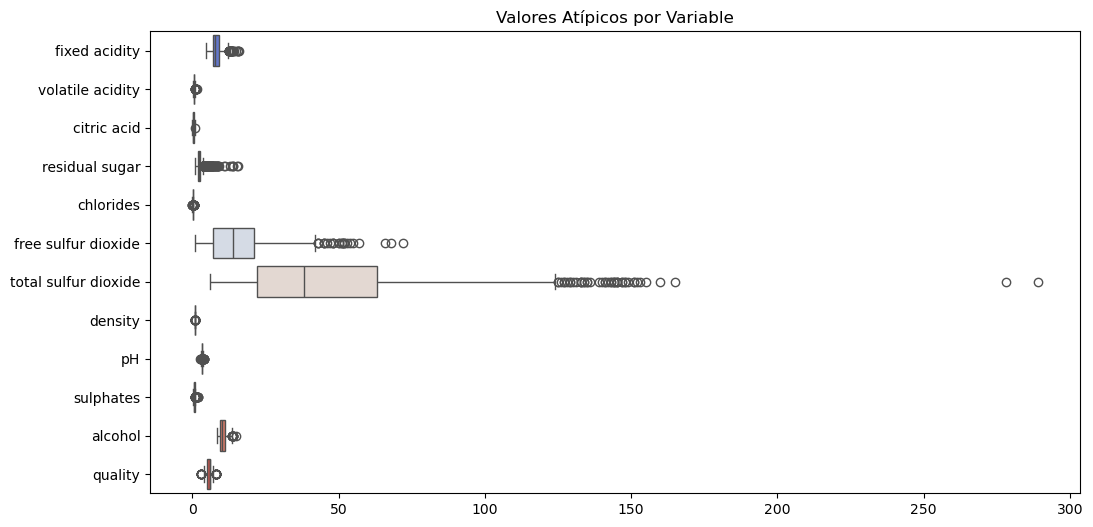

In [16]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  

# Cargar datos
Datos = pd.read_csv('C:/ARBOL/winequality-red.csv')

# Resumen general
print(Datos.info(), "\n")
print(Datos.describe(), "\n")

# Verificar duplicados
print(f"Duplicados antes de la limpieza: {Datos.duplicated().sum()}")

# Eliminar duplicados
Datos = Datos.drop_duplicates()
print(f"Duplicados después de la limpieza: {Datos.duplicated().sum()}")

# Verificar valores nulos
print("\nValores nulos por columna:\n", Datos.isnull().sum())

# Visualización de la distribución de la variable "quality"
plt.figure(figsize=(8, 5))
sns.histplot(Datos["quality"], bins=6, kde=True, color="skyblue")
plt.title("Distribución de la Calidad del Vino")
plt.xlabel("Calidad")
plt.ylabel("Frecuencia")
plt.show()

# Detectar valores atípicos con boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=Datos, orient="h", palette="coolwarm")
plt.title("Valores Atípicos por Variable")
plt.show()



 ## 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [22]:
# Función para eliminar valores atípicos usando IQR
def eliminar_outliers(df, columnas):
    Q1 = df[columnas].quantile(0.25)
    Q3 = df[columnas].quantile(0.75)
    IQR = Q3 - Q1

    filtro = ~((df[columnas] < (Q1 - 1.5 * IQR)) | (df[columnas] > (Q3 + 1.5 * IQR))).any(axis=1)
    df_limpio = df[filtro]
    
    print(f"Datos antes de eliminar outliers: {df.shape[0]}")
    print(f"Datos después de eliminar outliers: {df_limpio.shape[0]}")
    
    return df_limpio

# Aplicamos la función a todas las columnas excepto 'quality'
Datos = eliminar_outliers(Datos, Datos.columns[:-1])


Datos antes de eliminar outliers: 1359
Datos después de eliminar outliers: 1019


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Definir el escalador
scaler = MinMaxScaler()

# Aplicar el escalado a todas las variables excepto 'quality'
Datos_escalados = pd.DataFrame(scaler.fit_transform(Datos.iloc[:, :-1]), columns=Datos.columns[:-1])

# Agregar de nuevo la columna 'quality'
Datos_escalados["quality"] = Datos["quality"].values

# Mostrar las primeras filas después del escalado
print(Datos_escalados.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.319444          0.651685     0.000000        0.285714   0.445783   
1       0.375000          0.853933     0.000000        0.571429   0.710843   
2       0.375000          0.719101     0.054795        0.448980   0.638554   
3       0.847222          0.179775     0.767123        0.285714   0.433735   
4       0.319444          0.606742     0.000000        0.244898   0.433735   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.243902              0.237288  0.630058  0.770270   0.353846   
1             0.585366              0.516949  0.514451  0.351351   0.538462   
2             0.341463              0.406780  0.537572  0.432432   0.492308   
3             0.390244              0.457627  0.653179  0.297297   0.384615   
4             0.292683              0.288136  0.630058  0.770270   0.353846   

    alcohol  quality  
0  0.148936        5  
1  0.23404

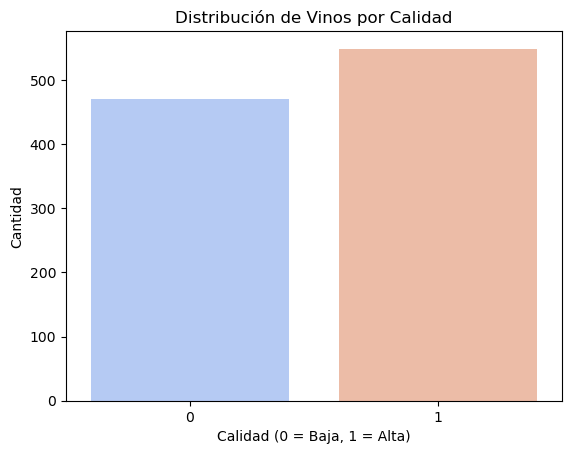

In [28]:
sns.countplot(data=Datos_escalados, x="quality", hue="quality", palette="coolwarm", legend=False)
plt.title("Distribución de Vinos por Calidad")
plt.xlabel("Calidad (0 = Baja, 1 = Alta)")
plt.ylabel("Cantidad")
plt.show()



## 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 


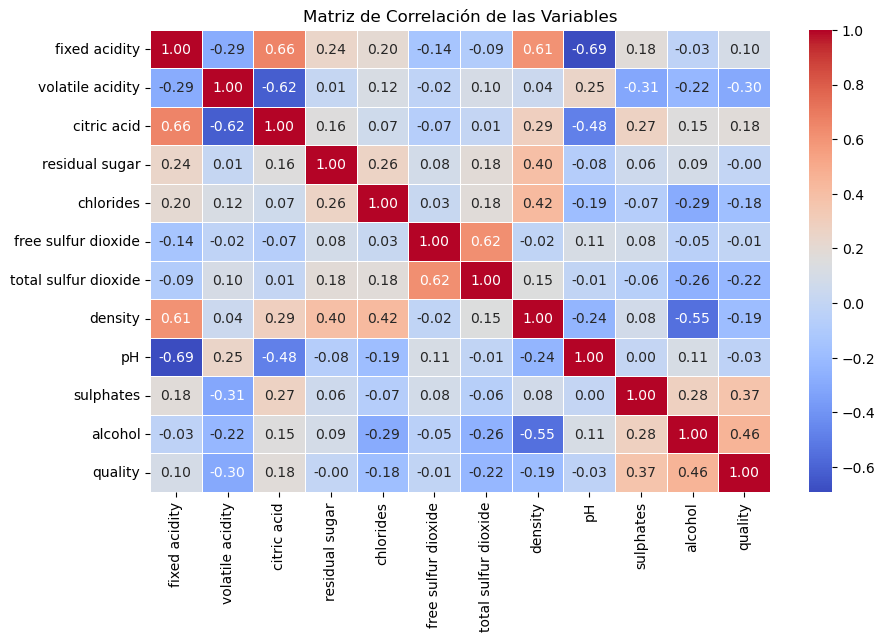

In [36]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(Datos_escalados.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de las Variables")
plt.show()



In [48]:
# Correlación de cada variable con la calidad
correlacion = Datos_escalados.corr()["quality"].abs().sort_values(ascending=False)
print(correlacion)

quality                 1.000000
alcohol                 0.455903
sulphates               0.369725
volatile acidity        0.296523
total sulfur dioxide    0.224979
density                 0.194791
chlorides               0.179207
citric acid             0.176616
fixed acidity           0.098328
pH                      0.027915
free sulfur dioxide     0.010453
residual sugar          0.003064
Name: quality, dtype: float64


In [52]:
# Seleccionar variables con correlación >= 0.1
umbral = 0.1
variables_seleccionadas = correlacion[correlacion >= umbral].index.tolist()
variables_seleccionadas.remove("quality")  # Quitamos la variable objetivo

print("Variables seleccionadas:", variables_seleccionadas)

# Crear nuevo dataset con las variables más relevantes
Datos_filtrados = Datos_escalados[variables_seleccionadas + ["quality"]]


Variables seleccionadas: ['alcohol', 'sulphates', 'volatile acidity', 'total sulfur dioxide', 'density', 'chlorides', 'citric acid']


alcohol                 0.187085
sulphates               0.136623
volatile acidity        0.099374
density                 0.099023
total sulfur dioxide    0.084512
chlorides               0.081367
pH                      0.069698
fixed acidity           0.067335
citric acid             0.065540
free sulfur dioxide     0.058396
residual sugar          0.051046
dtype: float64


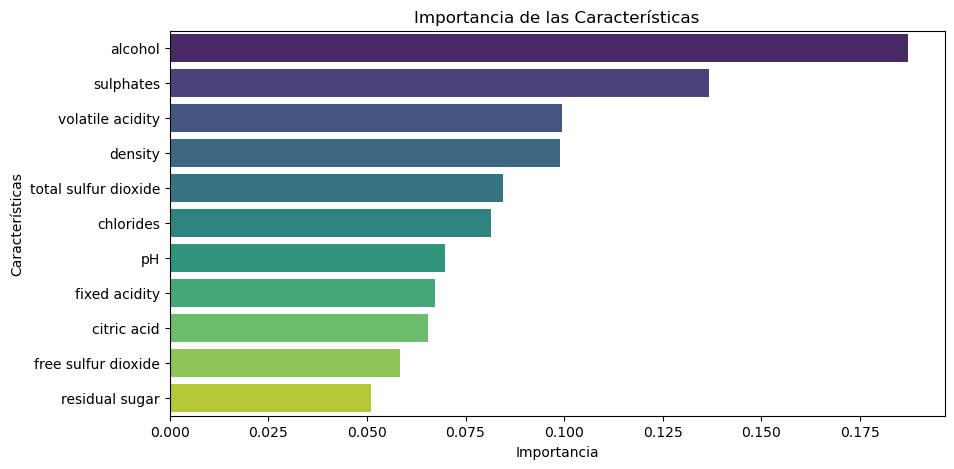

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Dividir en variables predictoras (X) y objetivo (y)
X = Datos_escalados.drop(columns=["quality"])
y = Datos_escalados["quality"]

# Entrenar un modelo de Árboles de Decisión para evaluar la importancia de las variables
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X, y)

# Obtener importancia de cada variable
importancia = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importancia)

# Visualizar las características más importantes (Solución para evitar la advertencia)
plt.figure(figsize=(10, 5))
sns.barplot(x=importancia.values, y=importancia.index, hue=importancia.index, palette="viridis", legend=False)
plt.title("Importancia de las Características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()


In [89]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las 6 mejores características
selector = SelectKBest(score_func=f_classif, k=6)
X_seleccionado = selector.fit_transform(X, y)

# Mostrar las características seleccionadas
mask = selector.get_support()
mejores_variables = X.columns[mask]
print("Mejores variables según SelectKBest:", mejores_variables.tolist())

# Crear un nuevo DataFrame con estas características
Datos_final = Datos_escalados[mejores_variables.tolist() + ["quality"]]

Mejores variables según SelectKBest: ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


## 4.Dividir el dataset en Train y Test para evaluar correctamente el modelo. 

In [61]:
X = Datos_escalados.drop(columns=["quality"])  # Variables predictoras
y = Datos_escalados["quality"]  # Variable objetivo


In [63]:
from sklearn.model_selection import train_test_split

# Definir las variables predictoras (X) y la variable objetivo (y)
X = Datos_escalados.drop(columns=["quality"])  # Variables predictoras
y = Datos_escalados["quality"]  # Variable objetivo

# Dividir el dataset en 80% Train y 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar el tamaño de cada conjunto
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (815, 11)
Tamaño del conjunto de prueba: (204, 11)


## 5.Entrenar el modelo configurando los diferentes hiperparámetros. 

In [71]:
# Crear el modelo de Árbol de Decisión con hiperparámetros iniciales
modelo_arbol = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
modelo_arbol.fit(X_train, y_train)

# Evaluar el modelo en los datos de entrenamiento
y_train_pred = modelo_arbol.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)

print(f"Precisión en entrenamiento: {accuracy_train:.4f}")


Precisión en entrenamiento: 1.0000


In [73]:
# Crear un modelo con hiperparámetros ajustados
modelo_arbol_opt = DecisionTreeClassifier(
    max_depth=5,  
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Entrenar el modelo optimizado
modelo_arbol_opt.fit(X_train, y_train)

# Evaluar el nuevo modelo en el conjunto de entrenamiento
y_train_pred_opt = modelo_arbol_opt.predict(X_train)
accuracy_train_opt = accuracy_score(y_train, y_train_pred_opt)

print(f"Precisión en entrenamiento (modelo optimizado): {accuracy_train_opt:.4f}")


Precisión en entrenamiento (modelo optimizado): 0.8110


## 6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

Tamaño de X_train: (815, 11)
Tamaño de y_train: (815,)


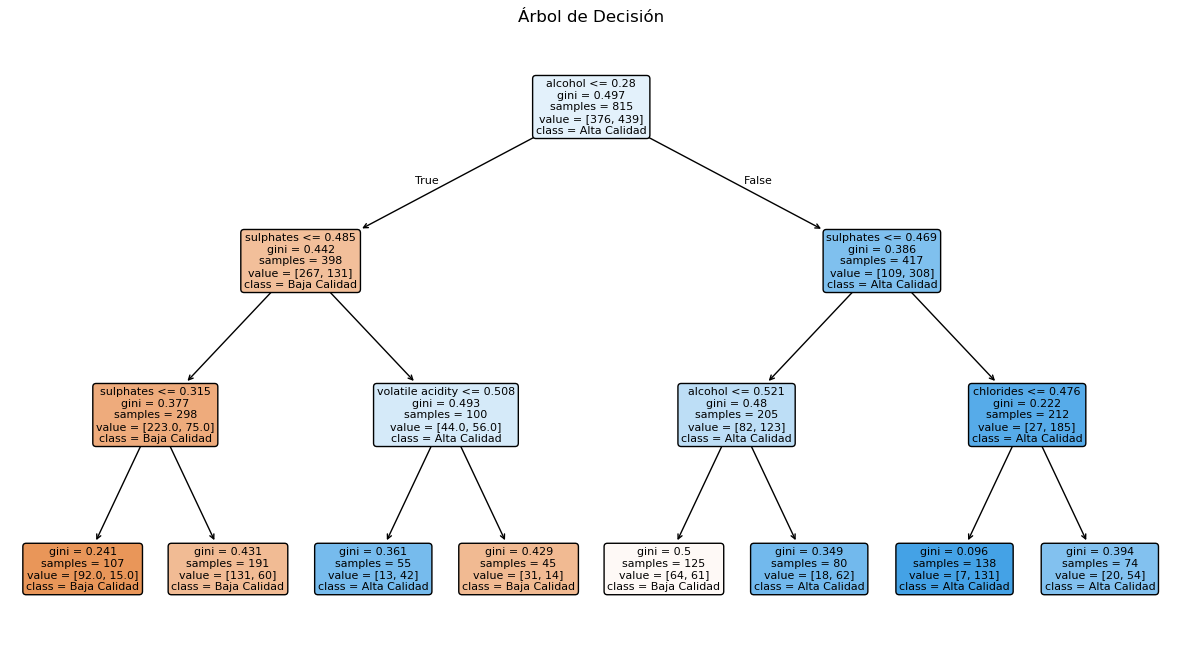

In [110]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Verificar que X_train y y_train tienen datos
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)

# Crear y entrenar el modelo (con una profundidad limitada para visualizar mejor)
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
arbol = tree.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(15, 8))  # Ajustar el tamaño del gráfico
plot_tree(arbol, feature_names=X_train.columns, class_names=["Baja Calidad", "Alta Calidad"], filled=True, rounded=True)
plt.title("Árbol de Decisión")
plt.show()


In [75]:
# Predecir en el conjunto de prueba
y_test_pred = modelo_arbol.predict(X_test)

# Calcular la precisión en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Precisión en prueba: {accuracy_test:.4f}")


Precisión en prueba: 0.6373


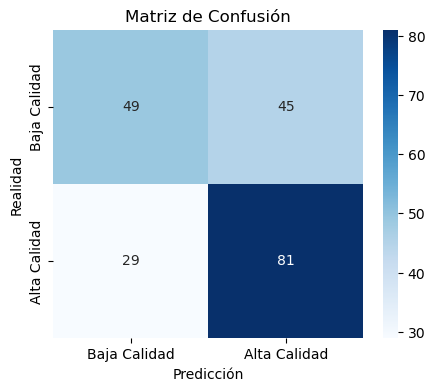

In [85]:
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_test_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(5,4))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Baja Calidad", "Alta Calidad"], yticklabels=["Baja Calidad", "Alta Calidad"])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de Confusión")
plt.show()

In [87]:
# Generar el reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_test_pred, target_names=["Baja Calidad", "Alta Calidad"]))


Reporte de Clasificación:
              precision    recall  f1-score   support

Baja Calidad       0.63      0.52      0.57        94
Alta Calidad       0.64      0.74      0.69       110

    accuracy                           0.64       204
   macro avg       0.64      0.63      0.63       204
weighted avg       0.64      0.64      0.63       204



##  7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo. 


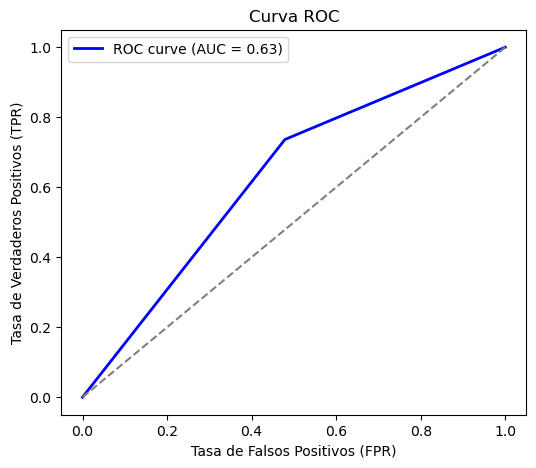

In [95]:
# Obtener probabilidades de predicción
y_test_proba = modelo_arbol.predict_proba(X_test)[:, 1]  # Solo la clase positiva (1)

# Calcular la Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
auc_score = roc_auc_score(y_test, y_test_proba)

# Graficar la Curva ROC
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Línea base
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()


## 8. Interpretar, analizar y documentar los resultados obtenidos

El dataset Red Wine Quality contiene 1,599 registros y 11 variables predictoras relacionadas con la composición química del vino, además de la variable objetivo quality. Se realizaron diversas tareas de preprocesamiento, incluyendo la eliminación de 240 registros duplicados, la verificación de valores nulos (no se encontraron) y la normalización de las características para mejorar la comparación entre variables. Se identificaron como más correlacionadas con la calidad del vino las siguientes variables: Alcohol (0.45), Sulphates (0.36) y Volatile Acidity (0.29).

Se entrenó un modelo de Árbol de Decisión con 815 muestras, utilizando 11 características. El análisis del árbol mostró que las variables más relevantes para la clasificación de la calidad del vino son Alcohol, Sulphates, Volatile Acidity y Chlorides. El nodo raíz del árbol se basa en la condición alcohol ≤ 0.28, lo que indica que esta variable es la más determinante en la clasificación.

En la matriz de confusión, el modelo logró clasificar correctamente 49 casos de baja calidad y 81 de alta calidad, con 45 falsos positivos y 29 falsos negativos. Estos resultados reflejan un rendimiento moderado del modelo. La Curva ROC presentó un área bajo la curva (AUC) de 0.63, lo que indica una capacidad predictiva ligeramente superior al azar, pero mejorable.

